In [69]:
import requests

from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from selenium.webdriver.chrome.options import Options 
options = Options() 
options.binary_location= 'C:\Program Files (x86)\Google\Chrome\Application\chrome.exe' 

driver = webdriver.Chrome("../WebCrawl/Driver/chromedriver",chrome_options = options)
driver.get("https://www.google.com/travel/hotels/%EC%A0%84%EC%A3%BC%EC%8B%9C")


<ipython-input-32-011208076186>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("../WebCrawl/Driver/chromedriver",chrome_options = options)


In [38]:
# whole_page = driver.page_source
# soup = BeautifulSoup(whole_page,'html.parser')
price_list = []
for _ in tqdm_notebook(range(45)):
    time.sleep(3)
    whole_page = driver.page_source
    soup = BeautifulSoup(whole_page,'html.parser')
    item_box = soup.find('div',{'class':'l5cSPd'}).find_all('div',{'class':'pjDrrc'})
    time.sleep(3)
    for item in item_box:
        
        try:
            price = int(item.find('a',{'class':'OxGZuc W8vlAc lRagtb'})['aria-label'].split(' ')[1].replace('₩','').replace(',',''))
            price_list.append(price)
        except:
            pass
    time.sleep(5)
    driver.find_element_by_xpath('//*[@id="yDmH0d"]/c-wiz[2]/div/div[2]/div/c-wiz/div/div[2]/div[1]/div/main/div/c-wiz/div[1]/div[8]/div[2]').click()

print(price_list)




<ipython-input-38-c6bf50ebc12d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(45)):


  0%|          | 0/45 [00:00<?, ?it/s]

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="yDmH0d"]/c-wiz[2]/div/div[2]/div/c-wiz/div/div[2]/div[1]/div/main/div/c-wiz/div[1]/div[8]/div[2]"}
  (Session info: chrome=92.0.4515.159)


In [55]:
price_dict = {'가격':price_list}
df_junju = pd.DataFrame(price_dict)
df_junju

,가격
0,59847
1,55800
2,29000
3,50739
4,59999
...,...
264,44000
265,46305
266,36015
267,34505


In [45]:
from selenium.webdriver.chrome.options import Options 
options = Options() 
options.binary_location= 'C:\Program Files (x86)\Google\Chrome\Application\chrome.exe' 

driver = webdriver.Chrome("../WebCrawl/Driver/chromedriver",chrome_options = options)
driver.get('https://www.google.com/travel/hotels/%EB%AA%A9%ED%8F%AC%EC%8B%9C')

<ipython-input-45-aea95185132a>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("../WebCrawl/Driver/chromedriver",chrome_options = options)


In [53]:
price_list1 = []
for _ in tqdm_notebook(range(12)):
    time.sleep(3)
    whole_page = driver.page_source
    soup = BeautifulSoup(whole_page,'html.parser')
    item_box = soup.find('div',{'class':'l5cSPd'}).find_all('div',{'class':'pjDrrc'})
    time.sleep(3)
    for item in item_box:
        
        try:
            price = int(item.find('a',{'class':'OxGZuc W8vlAc lRagtb'})['aria-label'].split(' ')[1].replace('₩','').replace(',',''))
            price_list1.append(price)
        except:
            pass
    time.sleep(5)
    driver.find_element_by_xpath('//*[@id="yDmH0d"]/c-wiz[2]/div/div[2]/div/c-wiz/div/div[2]/div[1]/div/main/div/c-wiz/div[1]/div[8]/div[2]').click()



<ipython-input-53-f66cc4569145>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(12)):


  0%|          | 0/12 [00:00<?, ?it/s]

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="yDmH0d"]/c-wiz[2]/div/div[2]/div/c-wiz/div/div[2]/div[1]/div/main/div/c-wiz/div[1]/div[8]/div[2]"}
  (Session info: chrome=92.0.4515.159)


In [54]:
price_dict1 = {'가격':price_list1}
df_mokpo = pd.DataFrame(price_dict1)
df_mokpo

,가격
0,90000
1,35000
2,79362
3,30001
4,36015
...,...
59,51450
60,36015
61,34505
62,49086


In [59]:
df_mokpo.가격.max()

260000

In [58]:
jun_pr = np.array(df_junju.가격)
freq1,_= np.histogram(jun_pr, bins=10, range=(0,500000))
freq1

array([151, 108,   4,   2,   0,   3,   0,   0,   0,   1], dtype=int64)

In [61]:
mok_pr = np.array(df_mokpo.가격)
freq2,_= np.histogram(mok_pr, bins=10, range=(0,500000))
freq2

array([38, 22,  0,  2,  0,  2,  0,  0,  0,  0], dtype=int64)

In [62]:
freq_class = [f'{i}~{i+50000}' for i in range(0,500000,50000)]
freq_class

['0~50000',
 '50000~100000',
 '100000~150000',
 '150000~200000',
 '200000~250000',
 '250000~300000',
 '300000~350000',
 '350000~400000',
 '400000~450000',
 '450000~500000']

In [63]:
rel_Mokpo_Price = freq2/freq2.sum()*100
rel_Junju_Price = freq1/freq1.sum()*100

In [65]:
Mokpo_Price = pd.DataFrame({'frequency' : freq2 },
                            index = pd.Index(freq_class,name = 'class'))
Mokpo_Price['relative frequency'] = rel_Mokpo_Price
Mokpo_Price

,frequency,relative frequency
class,,
0~50000,38,59.375
50000~100000,22,34.375
100000~150000,0,0.000
150000~200000,2,3.125
200000~250000,0,0.000
250000~300000,2,3.125
300000~350000,0,0.000
350000~400000,0,0.000
400000~450000,0,0.000


In [66]:
Junju_Price = pd.DataFrame({'frequency' : freq1 },
                            index = pd.Index(freq_class,name = 'class'))
Junju_Price['relative frequency'] = rel_Junju_Price
Junju_Price

,frequency,relative frequency
class,,
0~50000,151,56.133829
50000~100000,108,40.148699
100000~150000,4,1.486989
150000~200000,2,0.743494
200000~250000,0,0.000000
250000~300000,3,1.115242
300000~350000,0,0.000000
350000~400000,0,0.000000
400000~450000,0,0.000000


Text(0.5, 0, 'price')

<ipython-input-76-8af12e0b52b5>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(np.arange(0,freq1.max()+1),10)


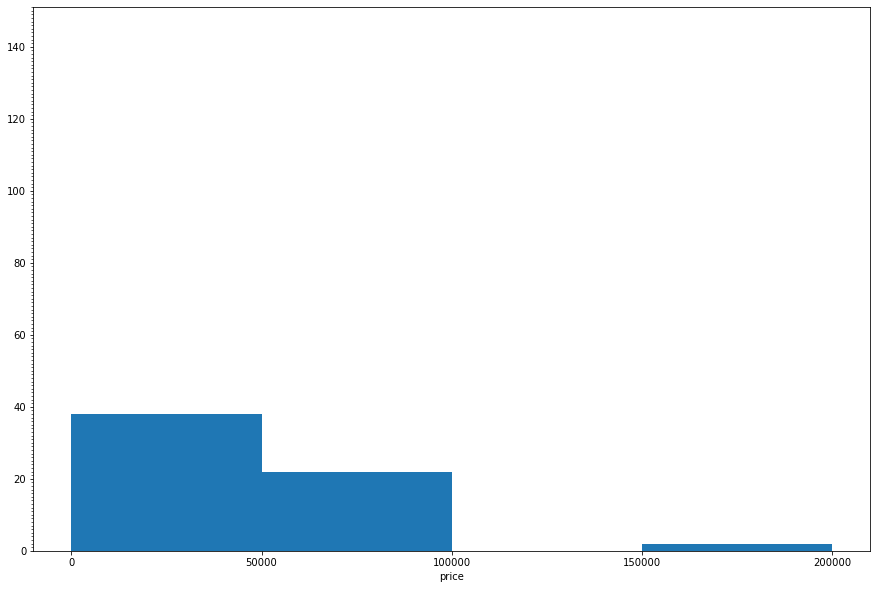

In [76]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
freq,_,_=ax.hist(mok_pr,bins=4,range=(0,200000))
ax.set_xlabel('price')
ax.set_xticks(np.linspace(0,200000,4+1))
ax.set_yticks(np.arange(0,freq1.max()+1),10)
plt.show()

Text(0.5, 0, 'price')

<ipython-input-75-2254cc8bcbef>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(np.arange(0,freq1.max()+1),10)


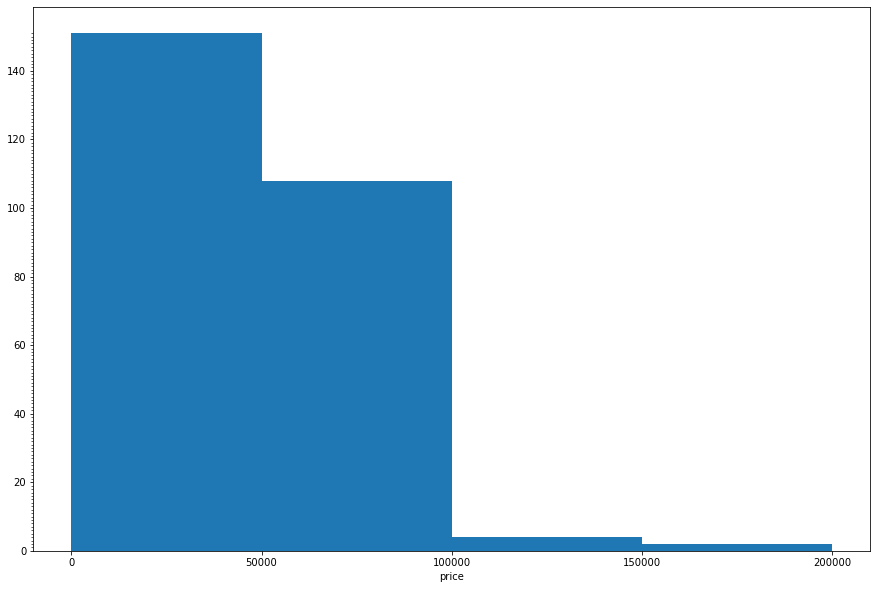

In [75]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
freq1,_,_=ax.hist(jun_pr,bins=4,range=(0,200000))
ax.set_xlabel('price')
ax.set_xticks(np.linspace(0,200000,4+1))
ax.set_yticks(np.arange(0,freq1.max()+1),10)
plt.show()